*  DATASET : IMDB(50000 REVİEWS)
tensorflow da bulunan önceden eğitilmiş model ile olumlu/olumsuz-0/1 tahmin yapılacak

In [1]:
!pip install tensorflow-hub
!pip install tensorflow-datasets

In [2]:
#1-Importıng lıbrarıes
import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.15.0
Eager mode:  True
Hub version:  0.16.1
GPU is NOT AVAILABLE


In [3]:
#2- Download IMDB DATASETS

train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7PRQZJ/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7PRQZJ/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7PRQZJ/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
# inceleyelim
train_examples_batch,train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [5]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

MODEL OLUŞTURALIM
*  ÖNCEDEN EĞİTİLMİŞ MODEL KULLANACAĞIZ.KARAR VERMEMİZ GEREKEN 3 MADDE VAR
>  1. METİN NASIL TEMSİL EDİLİR?
>  2. MODELDE KAÇ KATMAN KULLANACAĞIZ?
>  3. HER KATMAN İÇİN KAÇ TANE GİZLİ BİRİM KULLANCAĞIZ?

> 1. cevap: Cümleleri gömme vektörlerine çevireceğiz.İlk katman için önceden eğitilmiş bir metin gömme modeli kullanacağız.Önceden eğitilmiş bir modelin faydaları:
      - Metin ön işlemeyle uğraşmayacağız.html kod,küçültme...
      - Transfer öğrenmeden yararlanırız
      - Gömmenin sabit bir boyutu vardır bu yüzden işlemesi kolay hale gelir

Bu model için önceden eğitilmiş modellerden:"https://www.kaggle.com/models/google/nnlm/tensorFlow2/en-dim50/1?tfhub-redirect=true" kullanacağız

**Kullanabileceğimiz diğer modeller:**


1.   "https://tfhub.dev/google/nnlm-en-dim128/2" ------> nnlm-en-dim50/2 aynı veriler üzerinden eğitilmiştir farkı bu model daha büyük bir yerleştirme boyutuyla eğitilmiştir.Daha büyük yerleştirmeyle eğitilen model daga iyi sonuçlar verebilir fakat model eğitimi daha uzun sürer.
2.   "https://tfhub.dev/google/nnlm-en-dim128/2" -------->  "1.madde" ile aynı bunda extra olarak noktalama işaretlerini kaldırmak gibi ek metin normalleştirmeleri bulunur.Bu model metinde noktalama işaretleri ve ek karakterler varsa kullanılır
3.     " https://tfhub.dev/google/universal-sentence-encoder/4" -------> Derin Ortalamalı Ağ(DAN) kodlayıcı ile eğitilmiş 512 boyutlu yerleştirmeler sağlayan çok dah büyük bir model

4. Diğer Modeller için --------> "https://tfhub.dev/s?module-type=text-embedding"




In [6]:
# 1 - ÖNCE CÜMLELERİ GÖMMEK İÇİN BİR TENSORFLOW KATMANI OLUŞTURALIM.OLUŞTURDUĞUMUZ KATMANI BİR KAÇ GİRİŞ ÖRNEĞİNDE DENEYELİM
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"

hub_layer = hub.KerasLayer(embedding,
                           input_shape=[],
                           dtype =tf.string,
                           trainable = True)

hub_layer(train_examples_batch[:3])


<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862679,  0.7753425 , -0.07667089,
        -0.15752277,  0.01872335, -0.08169781, -0.3521876 ,  0.4637341 ,
        -0.08492756,  0.07166859, -0.00670817,  0.12686075, -0.19326553,
 

In [7]:
print(train_examples_batch[:3])

tf.Tensor(
[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot de

In [8]:
# şimdi modelimizi tamamen oluşturalım
model = tf.keras.Sequential()
model.add(hub_layer)  # Gömme Katmanı--> Önceden eğitilmiş model kullandık.Bu katman cümleyi belirteçlere(token) böler,her bir belirteci gömer ve ardından gömmeleri birleştirir.Ortaya çıkan boyutlar(num_axamples,embedding_dimension).Bu eğitilmiş model için dimension 50 dir
model.add(tf.keras.layers.Dense(16,activation = "relu")) # Bu sabit uzunluktaki çık vektörüdür.16 gizli bir ile tam bağlantılı katmandan geçirilir
model.add(tf.keras.layers.Dense(1)) # Tek bir çıkış düğümü ile yoğun bir şekilde bağlantılıdır.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48191433 (183.84 MB)
Trainable params: 48191433 (183.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# modeli derleyelim(model compile)
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              optimizer = "adam",
              metrics = ["accuracy"])

In [11]:
# modeli eğitelim
# batch_size = 512 lik partiler halinde yapacaz
# 10 epoch uygulayacaz
# Eğitim sırasında doğrulama setindeki 10000 örnekte modelin kaybını ve doğruluğunu izleyecez
history = model.fit(
    train_data.shuffle(10000).batch(512),
    epochs = 10,
    validation_data = validation_data.batch(512),
    verbose = 1
)

Epoch 1/10
30/30 [==============================] - 45s 1s/step - loss: 0.6694 - accuracy: 0.5117 - val_loss: 0.6220 - val_accuracy: 0.5772
Epoch 2/10
30/30 [==============================] - 59s 2s/step - loss: 0.5673 - accuracy: 0.6603 - val_loss: 0.5286 - val_accuracy: 0.7082
Epoch 3/10
30/30 [==============================] - 67s 2s/step - loss: 0.4500 - accuracy: 0.7911 - val_loss: 0.4329 - val_accuracy: 0.7888
Epoch 4/10
30/30 [==============================] - 56s 2s/step - loss: 0.3331 - accuracy: 0.8645 - val_loss: 0.3642 - val_accuracy: 0.8407
Epoch 5/10
30/30 [==============================] - 47s 2s/step - loss: 0.2439 - accuracy: 0.9098 - val_loss: 0.3273 - val_accuracy: 0.8502
Epoch 6/10
30/30 [==============================] - 46s 2s/step - loss: 0.1756 - accuracy: 0.9396 - val_loss: 0.3148 - val_accuracy: 0.8554
Epoch 7/10
30/30 [==============================] - 47s 2s/step - loss: 0.1273 - accuracy: 0.9597 - val_loss: 0.3063 - val_accuracy: 0.8682
Epoch 8/10
30/30 [==

In [13]:
# Modeli değerlendirelim
results = model.evaluate(test_data.batch(512),verbose = 2)

for name , value in zip(model.metrics_names,results):
  print("%s: %.3f" %(name,value))

49/49 - 10s - loss: 0.3588 - accuracy: 0.8542 - 10s/epoch - 198ms/step
loss: 0.359
accuracy: 0.854


GÖRSELLEŞTİRELİM

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

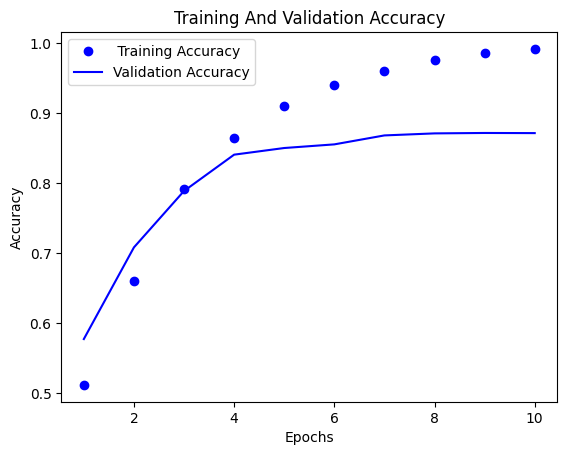

In [15]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,"bo",label = " Training Accuracy")
plt.plot(epochs,val_acc,"b" , label = "Validation Accuracy")
plt.title("Training And Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



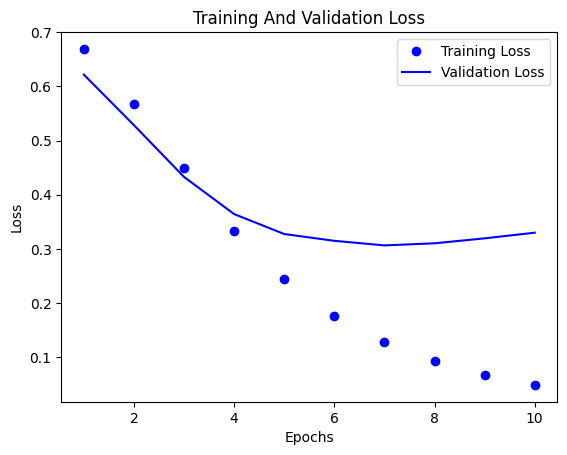

In [16]:
plt.plot(epochs,loss,"bo",label = "Training Loss")
plt.plot(epochs,val_loss,"b",label = "Validation Loss")
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Amaç daha gelişmiş yaklaşımlarla %95 e yaklaşmaya çalışmaktır.Bunun içinde yapılması gerekenler
1. Önceden işlenmiş metinle metin sınıflandırması yapılabilir
2. EarlyStopping kullanılabilir
3. Başka önceden eğitilmiş modeller kullanılabilir(Train setinin eğitimi uzun sürebilir)

kaynak : tensorflow.org